# GRIP : The Sparks Foundation

## Data Science & Business Analytics Intern

## Task 1 : Prediction using Supervised ML

### Represented by : Ravi Shankar Kumar

##### Objective:
#####  (i)Predict the percentage of an student based on the no. of study hours.
##### (ii)What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
# Improting Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
# Importing data set
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
data.shape

(25, 2)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Figure size 864x720 with 0 Axes>

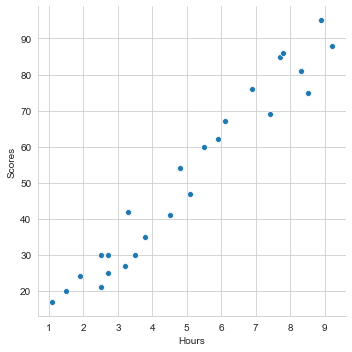

In [32]:
#plotting scatter plot
plt.figure(figsize=(12,10))
sns.relplot(x='Hours',y='Scores',data=data,kind='scatter')

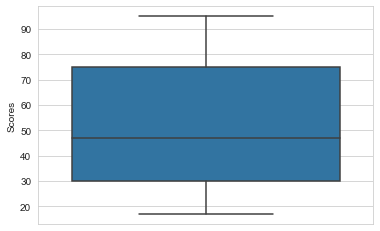

In [33]:
#plotting box plot 
sns.boxplot(data['Scores'],orient='vertical')

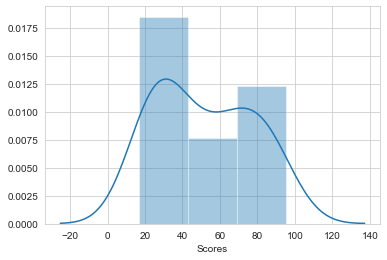

In [34]:
# plotting distplot for Scores
sns.distplot(data['Scores'])

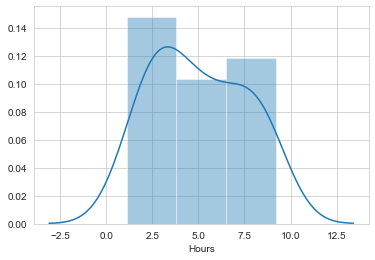

In [35]:
#plotting distplot for hours
sns.distplot(data['Hours'])

In [36]:
# Finding out the correlation between Study hours and Scores of Student.
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


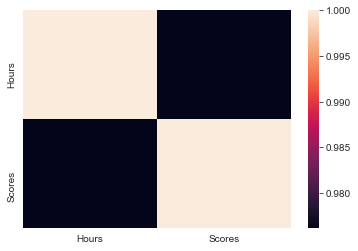

In [37]:
#Plotting heat map to visualize the correlation.
corr = data.corr()
sns.heatmap(corr)

#### Linear Regression

In [38]:
# Saperating the dependent and independent variables.
x=data.drop('Scores',axis=1)
y=data['Scores']

In [39]:
#splitting data into train and test data set.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [40]:
# Importing liberary for LinearRegression.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [41]:
# Fitting data to train our model.
reg.fit(x_train,y_train)

LinearRegression()

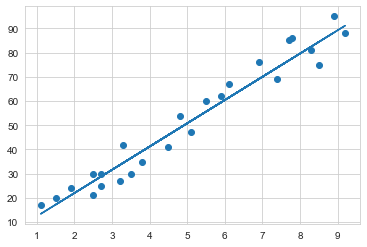

In [42]:
# Plotting Regression Line

m=reg.coef_
c=reg.intercept_
line=m*x+c

# Plotting for the test data set

plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [43]:
# Predict the dataset.
y_pred = reg.predict(x_test)

#### Predicting the percentage of students on the basis of study hours.

In [44]:
# Compare Actual & Prediction of data.
actual_prediction = pd.DataFrame({'Target':y_test,'Prediction':y_pred})
actual_prediction

,Target,Prediction
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


##### What would be the prediction of score if the student studies 9.25 hrs/day?

In [45]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies 9.25 hrs per day then score will be:",np.array(s),"%.")

If a student studies 9.25 hrs per day then score will be: [91.56986604] %.


### Model Evaluation

In [47]:
#importing liberaries to evaluate our model.
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.5916495300630285


In [48]:
from sklearn.metrics import r2_score
print("R*2 Score:",r2_score(y_test, y_pred))

R*2 Score: 0.971014141329942


##### After evaluating our model,we can conclude  that mean absolute error is 4.591 which is very less and the R*2 is around 0.971 means our model is robust & prediction is quite good enough.

### Thank You!